In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)
random.seed(54)

In [2]:
train=pd.read_csv('heart.csv')

In [3]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
train.shape

(303, 14)

In [5]:
train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
train.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

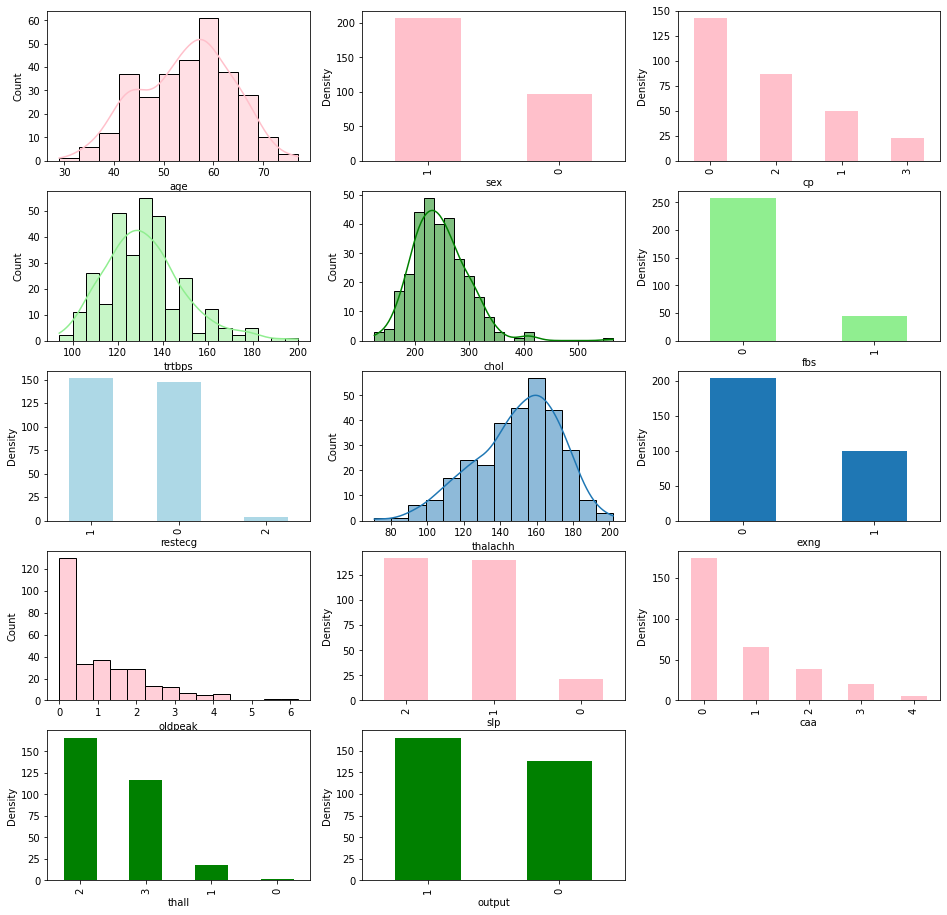

In [8]:
fig=plt.figure(figsize=(16,16))
fig = plt.subplot(531)
sns.histplot(train['age'],kde=True,label=' Age',color='pink')

fig = plt.subplot(532)
x=train['sex'].value_counts()
x.plot(kind='bar',label='sex',color='pink',xlabel='sex',ylabel='Density')

fig = plt.subplot(533)
x=train['cp'].value_counts()
x.plot(kind='bar',label='cp',color='pink',xlabel='cp',ylabel='Density')

fig = plt.subplot(534)
sns.histplot(train['trtbps'],color='lightgreen',kde=True)

fig = plt.subplot(535)
sns.histplot(train['chol'],kde=True,label='Cholestrol',color='green')

fig = plt.subplot(536)
x=train['fbs'].value_counts()
x.plot(kind='bar',label='fbs',xlabel='fbs',color='lightgreen',ylabel='Density')

fig = plt.subplot(537)
x=train['restecg'].value_counts()
x.plot(kind='bar',label='restecg',xlabel='restecg',color='lightblue',ylabel='Density')

fig = plt.subplot(538)
sns.histplot(train['thalachh'],kde=True, label='thalachh')


fig = plt.subplot(539)
x=train['exng'].value_counts()
x.plot(kind='bar',label='exng',xlabel='exng',ylabel='Density')

fig = plt.subplot(5,3,10)
sns.histplot(train['oldpeak'],color='pink', label='oldpeak')

fig = plt.subplot(5,3,11)
x=train['slp'].value_counts()
x.plot(kind='bar',label='slp',xlabel='slp',color='pink',ylabel='Density')

fig = plt.subplot(5,3,12)
x=train['caa'].value_counts()
x.plot(kind='bar',label='caa',xlabel='caa',color='pink',ylabel='Density')


fig = plt.subplot(5,3,13)
x=train['thall'].value_counts()
x.plot(kind='bar',label='thall',xlabel='thall',color='green',ylabel='Density')

fig = plt.subplot(5,3,14)
x=train['output'].value_counts()
x.plot(kind='bar',label='output',xlabel='output',color='green',ylabel='Density')


plt.show()

<AxesSubplot:>

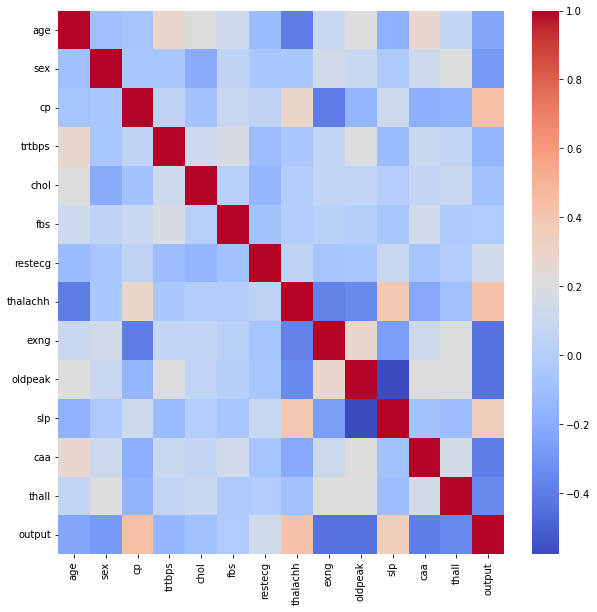

In [9]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cmap='coolwarm')

<Figure size 1152x1152 with 0 Axes>

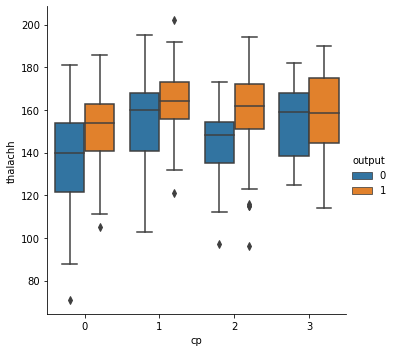

In [10]:
fig=plt.figure(figsize=(16,16))
sns.catplot(x="cp",y='thalachh',hue='output',kind='box',data=train)

<AxesSubplot:xlabel='output', ylabel='thalachh'>

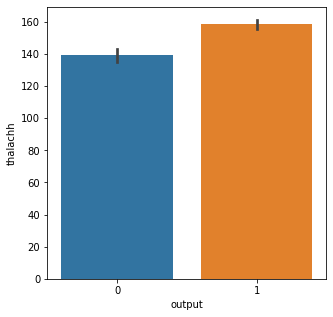

In [11]:
fig=plt.figure(figsize=(5,5))
sns.barplot(x=train['output'],y=train['thalachh'])

In [12]:
def Resample(data):
    label_0=data[data.output==0] #0
    label_1=data[data.output==1] #1
   
    # upsample minority
    label_0_upsampled = resample(label_0,
                              replace=True, # sample with replacement
                              n_samples=len(label_1), # match number in majority class
                              random_state=27) # reproducible results
    
    # combine majority and upsampled minority
    upsampled = pd.concat([label_1, label_0_upsampled])
    return upsampled

In [13]:
train=Resample(train)

In [14]:
train.shape

(330, 14)

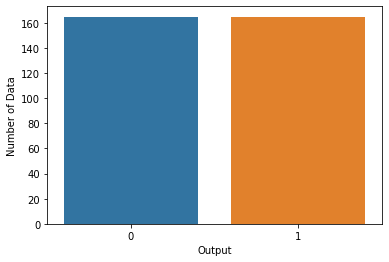

In [15]:
x=train['output'].value_counts().values
plot=sns.barplot(["0","1"],x)
plot.set(xlabel='Output', ylabel='Number of Data')
plt.show()

In [16]:
def normalize(x):
  z=(x-x.mean())/x.std()
  return z

In [17]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
labels=train['output']
train=train.drop(['output'],axis=1)
train=normalize(train)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=.2, random_state=1,stratify=labels)

In [21]:
model=keras.Sequential([
     layers.Dense(32,activation='relu',input_shape=[13]),
     layers.Dense(64,activation='relu'),
     layers.Dense(128,activation='relu'),
     layers.Dense(128,activation='relu'),
     layers.Dense(1)

])

In [22]:
model.compile( 
    optimizer=keras.optimizers.Adam(lr=0.001),
    loss='mae',
    metrics=['accuracy']
)

In [23]:
early_stopping= keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='auto',
                                    patience=20,restore_best_weights=True)

In [24]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='auto',factor=0.5,patience=5)

In [25]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=28,epochs=200,callbacks=[early_stopping,lr_scheduler])

Epoch 1/200
10/10 [==============================] - 2s 52ms/step - loss: 0.4330 - accuracy: 0.5758 - val_loss: 0.3638 - val_accuracy: 0.6818 - lr: 0.0010
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3343 - accuracy: 0.7652 - val_loss: 0.3177 - val_accuracy: 0.7576 - lr: 0.0010
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2806 - accuracy: 0.8106 - val_loss: 0.3003 - val_accuracy: 0.8030 - lr: 0.0010
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2478 - accuracy: 0.8258 - val_loss: 0.2861 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.8598 - val_loss: 0.2633 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.2108 - accuracy: 0.8788 - val_loss: 0.2472 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 7/200
10/10 [==============================] - 0s 13ms/step - loss: 

In [26]:
model.evaluate(x_test,y_test,verbose=2)

3/3 - 0s - loss: 0.2319 - accuracy: 0.9091 - 39ms/epoch - 13ms/step


[0.23187696933746338, 0.9090909361839294]

In [27]:
y_pred=model.predict(x_test).astype("int32")

3/3 [==============================] - 0s 2ms/step


[Text(0.5, 15.0, 'Actual values'), Text(33.0, 0.5, 'Predict values')]

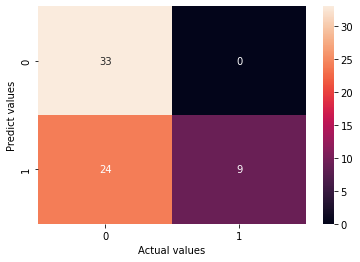

In [28]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf, annot=True).set(xlabel='Actual values',ylabel='Predict values')

In [29]:
recall_score(y_test,y_pred,average='macro')

0.6363636363636364

In [30]:
f1_score(y_test,y_pred,average='macro')

0.580952380952381

In [31]:
precision_score(y_test,y_pred,average='macro')

0.7894736842105263